# Model Comparison for Robot Policy Performance

This notebook compares the performance of different models tested using the `test_policy_client_mse.py` script.

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd
import seaborn as sns
from typing import Dict, List, Any

# Set plot style
plt.style.use('ggplot')
sns.set_context("talk")

In [254]:
# Define paths to model action files
# model_paths = {
#     "openvla": "results/actions_openvla_20250421_152240.pkl",
#     "o4-mini": "results/actions_o4-mini_20250421_152435.pkl",
#     "gpt-4o": "results/actions_gpt-4o_20250421_180623.pkl",
#     # "gpt-4o-tunnel": "results/actions_gpt-4o-tunnel_20250423_134722.pkl",
#     # "gpt-4o-tunnel-async": "results/actions_gpt-4o-tunnel_20250423_140019.pkl",
#     # "gpt-4o-mini": "results/actions_gpt-4o-mini_20250423_152620.pkl",
#     # "gpt-4o-mini-tunnel-async": "results/actions_gpt-4o-mini-async_20250423_140435.pkl",
#     # "gpt-4o-mini-async": "results/actions_gpt-4o-mini_20250423_141040.pkl",
#     # "gemini-2.0-flash-tunnel": "results/actions_gemini-2.0-flash-tunnel_20250423_142234.pkl",
#     "o3": "results/actions_o3_20250421_181454.pkl",
#     "gemini-2.5-pro": "results/actions_gemini-2-5-pro_20250421_172434.pkl",
#     "gemini-2.5-pro-history1": "results/actions_gemini-2-5-pro-history1_20250429_151242.pkl",
#     # "gemini-2.5-flash": "results/actions_gemini-2.5-flash_20250421_180103.pkl",
#     # "gemini-2.5-flash-history1": "results/actions_gemini-2-5-flash-history1_20250429_154648.pkl",
#     "gemini-2.5-pro-historytest": "results/actions_testhist_20250501_221849.pkl",
#     "gemini-2.5-pro-historytest2": "results/actions_testhist_20250501_222835.pkl",
#     "gemini-2-5-pro-historytest3-lang": "results/actions_testhist_lang_20250501_230050.pkl",
#     # "gemini-2.5-flash-tunnel": "results/actions_gemini-2.5-flash-tunnel_20250423_133919.pkl",
#     "gemini-2-0-flash": "results/actions_gemini-2-0-flash_20250422_140401.pkl",
#     # "gemini-2.0-flash-tunnel-async": "results/actions_gemini-2.0-flash-tunnel-async_20250423_142053.pkl",
#     "claude-3-5-sonnet": "results/actions_claude-3-5-sonnet_20250422_135539.pkl",
#     "claude-3-7-sonnet": "results/actions_claude-3-7-sonnet_20250422_141227.pkl",
#     # "openvla-tunnel": "results/actions_openvla-tunnel_20250423_110538.pkl",
#     # "openvla-tunnel2": "results/actions_openvla-tunnel2_20250423_110927.pkl"
#     # Add more models as needed
#     "ecot": "results/actions_ecot-tunnel_20250424_173038.pkl"
# }


RESULTS_DIR = "results"
RESULTS = dict()
for model_name in os.listdir(RESULTS_DIR):
    if os.path.isdir(os.path.join(RESULTS_DIR, model_name)):
        RESULTS[model_name] = list()
        for filename in os.listdir(os.path.join(RESULTS_DIR, model_name)):
            if 'metrics' in filename and filename.endswith('.pkl'):
                print(filename)
                metrics_dict = pickle.load(open(os.path.join(RESULTS_DIR, model_name, filename), "rb"))
                actions_file = filename.replace('metrics', 'actions')
                actions_dict = pickle.load(open(os.path.join(RESULTS_DIR, model_name, actions_file), "rb"))
                info_dict = {k: metrics_dict[k] for k in ['timestamp', 'model_name', 'history_length', 'history_choice']}
                model_name = model_name.lstrip("history_sweep_")
                RESULTS[model_name].append({"info": info_dict, "actions": actions_dict, "metrics": metrics_dict})


metrics_hist_len_10_hist_choice_all_20250502_130151.pkl
metrics_hist_len_10_hist_choice_third_20250502_130515.pkl
metrics_hist_len_10_hist_choice_alternate_20250502_130151.pkl
metrics_20250502_124430.pkl
metrics_hist_len_10_hist_choice_alternate_20250502_123221.pkl
metrics_hist_len_10_hist_choice_third_20250502_110758.pkl
metrics_20250502_123647.pkl
metrics_hist_len_10_hist_choice_all_20250502_112302.pkl


In [234]:
# # Function to load model data
# def load_model_data(model_paths):
#     model_data = {}
    
#     for model_name, path in model_paths.items():
#         try:
#             # Try to load the actions file
#             with open(path, 'rb') as f:
#                 model_data[model_name] = {
#                     'actions': pickle.load(f)
#                 }
                
#             # Try to load corresponding metrics file if it exists
#             metrics_path = path.replace('actions_', 'metrics_')
#             if os.path.exists(metrics_path):
#                 with open(metrics_path, 'rb') as f:
#                     model_data[model_name]['metrics'] = pickle.load(f)
#             else:
#                 print(f"Warning: Metrics file not found for {model_name}")
                
#         except Exception as e:
#             print(f"Error loading data for {model_name}: {e}")
    
#     return model_data

In [235]:
# Load all model data
# model_data = load_model_data(model_paths)

def info_dict_to_title(info_dict):
    return f"{info_dict['model_name']}-histlen-{info_dict['history_length']}-histchoice-{info_dict['history_choice']}"

# Check which models were loaded successfully
print(f"Successfully loaded data for {len(RESULTS)} models:")
for model_name, results_list in RESULTS.items():
    print(model_name)
    for result in results_list:
        print(f"- {info_dict_to_title(result['info'])}")

Successfully loaded data for 4 models:
sweeps
history_sweep_gemini-2-5-pro
- history_sweep_gemini-2-5-pro-histlen-10-histchoice-all
- history_sweep_gemini-2-5-pro-histlen-10-histchoice-third
- history_sweep_gemini-2-5-pro-histlen-10-histchoice-alternate
gemini-2-5-pro
- gemini-2-5-pro-histlen-None-histchoice-None
- gemini-2-5-pro-histlen-10-histchoice-alternate
- gemini-2-5-pro-histlen-10-histchoice-third
- gemini-2-5-pro-histlen-None-histchoice-None
- gemini-2-5-pro-histlen-10-histchoice-all
history_sweep_gemini


In [236]:
# Function to compute metrics for models without pre-computed metrics
def compute_metrics(pred_actions, gt_actions):
    results = {}
    
    # MSE - Mean Squared Error
    results["mse"] = np.mean(np.square(pred_actions - gt_actions))
    
    # MAE - Mean Absolute Error
    results["mae"] = np.mean(np.abs(pred_actions - gt_actions))
    
    # Normalized MSE - divide by variance of ground truth
    gt_var = np.var(gt_actions)
    if gt_var > 0:
        results["nmse"] = results["mse"] / gt_var
    else:
        results["nmse"] = float('inf')
    
    # Action magnitude comparison
    results["pred_mag"] = np.mean(np.linalg.norm(pred_actions, axis=1))
    results["gt_mag"] = np.mean(np.linalg.norm(gt_actions, axis=1))
    results["mag_ratio"] = results["pred_mag"] / results["gt_mag"] if results["gt_mag"] > 0 else float('inf')
    
    return results

In [237]:
# Extract and organize metrics across models for comparison
def extract_comparison_metrics(model_data: dict[str, list[dict]]):
    comparison = {}
    
    for model_name, model_results in model_data.items():
        for data in model_results:
            model_title = info_dict_to_title(data['info'])
            if model_title in comparison:
                nth_copy = len([x for x in comparison.keys() if x.startswith(model_title)])
                model_title = f"{model_title}-{nth_copy}"
            print(f"adding {model_title} to comparison")
            # If we have pre-computed metrics, use those
            if 'metrics' in data and 'avg_metrics' in data['metrics']:
                comparison[model_title] = data['metrics']['avg_metrics']
            else:
                # Otherwise, compute metrics from actions
                print(f"Computing metrics for {model_title}...")
                all_results = []
                
                for traj in data['actions']:
                    pred_actions = traj['pred_actions']
                    gt_actions = traj['gt_actions']
                    
                    results = compute_metrics(pred_actions, gt_actions)
                    
                    # Add timing information if available
                    if 'inference_times' in traj:
                        results['mean_inference_time'] = np.mean(traj['inference_times'])
                        
                    all_results.append(results)
                
                # Compute average metrics across all trajectories
                avg_metrics = {k: np.mean([r[k] for r in all_results]) for k in all_results[0]}
                comparison[model_title] = avg_metrics

    averaged_comparison = dict()
    multiples = [t for t in comparison.keys() if t.endswith('-1')]
    for t in multiples:
        base_title = t[:-2]
        matched_titles = [t for t in comparison.keys() if t.startswith(base_title)]
        avg_metrics = {k: np.mean([comparison[t][k] for t in matched_titles]) for k in comparison[matched_titles[0]].keys()}
        averaged_comparison[base_title] = avg_metrics
        for t in matched_titles:
            del comparison[t]
    comparison.update(averaged_comparison)
    return comparison

In [238]:
# Extract performance metrics for comparison
comparison_metrics = extract_comparison_metrics(RESULTS)

# Create a DataFrame for easier visualization
metrics_of_interest = ['mse', 'mae', 'nmse', 'r2', 'cosine_sim', 'pearson_r', 
                       'pred_mag', 'gt_mag', 'mag_ratio', 'mean_inference_time']

comparison_df = pd.DataFrame(index=metrics_of_interest)

for model_name, metrics in comparison_metrics.items():
    model_values = [metrics.get(metric, np.nan) for metric in metrics_of_interest]
    comparison_df[model_name] = model_values

# Display the comparison table
comparison_df

adding history_sweep_gemini-2-5-pro-histlen-10-histchoice-all to comparison
adding history_sweep_gemini-2-5-pro-histlen-10-histchoice-third to comparison
adding history_sweep_gemini-2-5-pro-histlen-10-histchoice-alternate to comparison
adding gemini-2-5-pro-histlen-None-histchoice-None to comparison
adding gemini-2-5-pro-histlen-10-histchoice-alternate to comparison
adding gemini-2-5-pro-histlen-10-histchoice-third to comparison
adding gemini-2-5-pro-histlen-None-histchoice-None-1 to comparison
adding gemini-2-5-pro-histlen-10-histchoice-all to comparison


history_sweep_gemini-2-5-pro-histlen-10-histchoice-all  \
mse                                                           0.030922        
mae                                                           0.036518        
nmse                                                          0.335432        
r2                                                            0.664568        
cosine_sim                                                    0.869490        
pearson_r                                                     0.855255        
pred_mag                                                      0.865771        
gt_mag                                                        0.791604        
mag_ratio                                                     1.147818        
mean_inference_time                                                NaN        

                     history_sweep_gemini-2-5-pro-histlen-10-histchoice-third  \
mse                                                           0.032367          
mae                                                           0.037806          
nmse                                                          0.378163          
r2                                                            0.621837          
cosine_sim                                                    0.838502          
pearson_r                                                     0.822191          
pred_mag                                                      0.855773          
gt_mag                                                        0.791604          
mag_ratio                                                     1.106585          
mean_inference_time                                                NaN          

                     history_sweep_gemini-2-5-pro-histlen-10-histchoice-alternate  \
mse                                                           0.017341              
mae                                                           0.022630              
nmse                                                          0.186644              
r2                                                            0.813356              
cosine_sim                                                    0.930549              
pearson_r                                                     0.921957              
pred_mag                                                      0.870769              
gt_mag                                                        0.791604              
mag_ratio                                                     1.115096              
mean_inference_time                                                NaN              

                     gemini-2-5-pro-histlen-10-histchoice-alternate  \
mse                                                        0.020912   
mae                                                        0.026138   
nmse                                                       0.224592   
r2                                                         0.775408   
cosine_sim                                                 0.918197   
pearson_r                                                  0.908259   
pred_mag                                                   0.886057   
gt_mag                                                     0.791604   
mag_ratio                                                  1.148642   
mean_inference_time                                             NaN   

                     gemini-2-5-pro-histlen-10-histchoice-third  \
mse                                                    0.035215   
mae                                                    0.040859   
nmse                                                   0.406234   
r2                                                     0.593766   
cosine_sim                                             0.825148   
pearson_r                                              0.807511   
pred_mag                                               0.835853   
gt_ma

## Performance Metric Comparisons

In [239]:
def plot_metric_comparison(comparison_df, metric_name, title=None, lower_is_better=True):
    plt.figure(figsize=(10, 6))
    
    # Get the data for this metric
    metric_values = comparison_df.loc[metric_name]
    
    # Sort models by metric value
    if lower_is_better:
        sorted_models = metric_values.sort_values().index
    else:
        sorted_models = metric_values.sort_values(ascending=False).index
    
    # Create bar plot
    bars = plt.bar(sorted_models, metric_values[sorted_models])
    
    # Add value labels on top of bars with smaller font size
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.4f}', ha='center', va='bottom', rotation=0, fontsize=8)
    
    # Add title and labels
    plt.title(title or f'{metric_name.upper()} Comparison Across Models')
    plt.ylabel(metric_name)
    plt.xlabel('Model')
    
    # Set rotated tick labels with proper alignment
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    
    return plt

<module 'matplotlib.pyplot' from '/Users/jphillips/miniforge3/envs/lapa/lib/python3.10/site-packages/matplotlib/pyplot.py'>

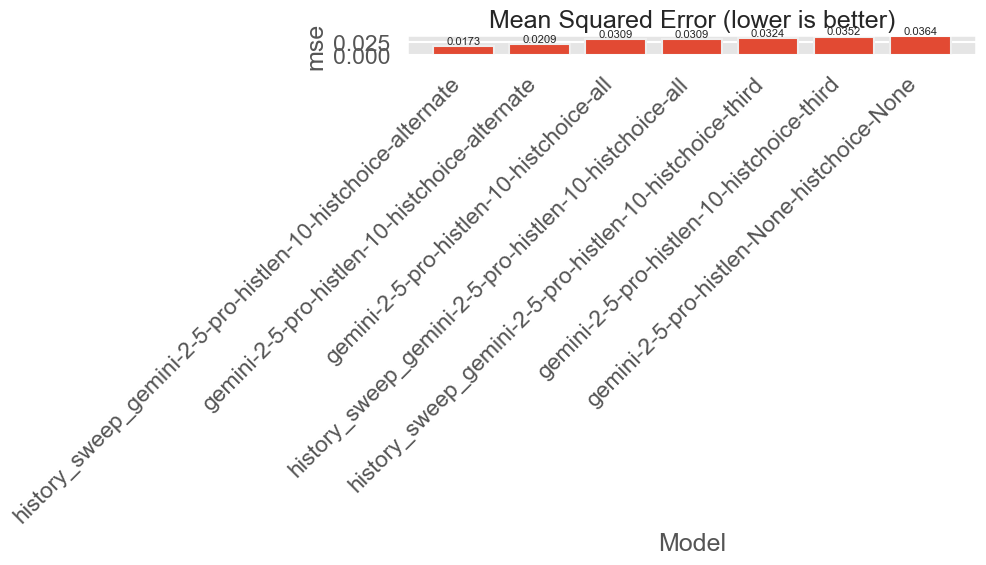

In [240]:
# Plot MSE comparison (lower is better)
plot_metric_comparison(comparison_df, 'mse', 'Mean Squared Error (lower is better)')

<module 'matplotlib.pyplot' from '/Users/jphillips/miniforge3/envs/lapa/lib/python3.10/site-packages/matplotlib/pyplot.py'>

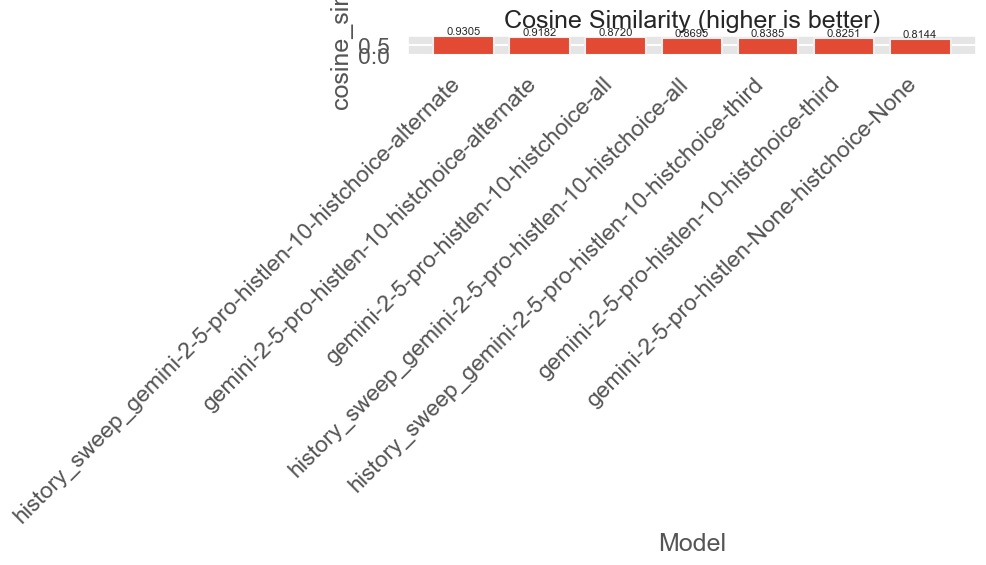

In [241]:
# Plot Cosine Similarity comparison (higher is better)
plot_metric_comparison(comparison_df, 'cosine_sim', 'Cosine Similarity (higher is better)', lower_is_better=False)

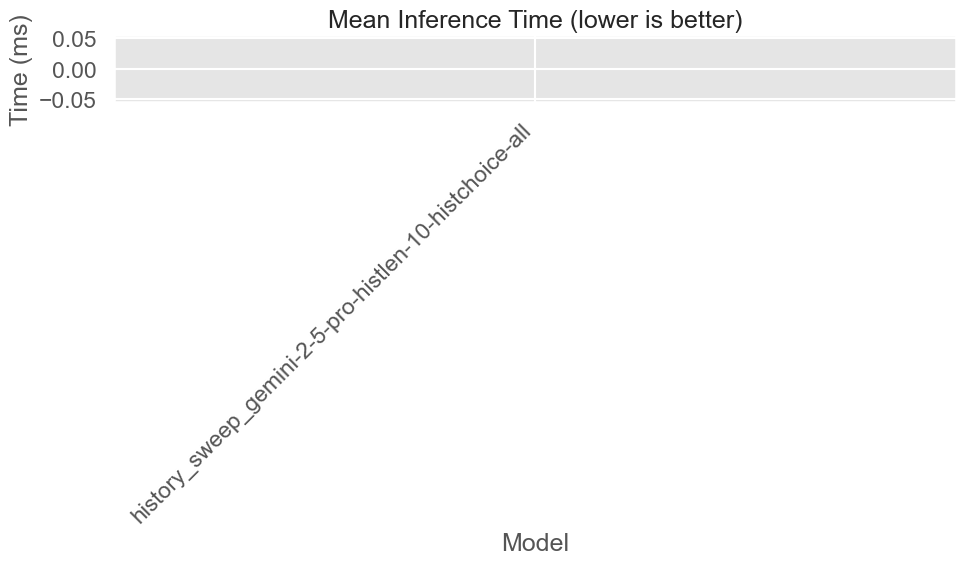

In [242]:
# Plot Inference Time comparison (lower is better)
if 'mean_inference_time' in comparison_df.index:
    # Convert to milliseconds for better readability
    inference_times_ms = comparison_df.loc['mean_inference_time'] * 1000
    
    plt.figure(figsize=(10, 6))
    
    # Sort models by inference time
    sorted_models = inference_times_ms.sort_values().index
    
    # Create bar plot
    bars = plt.bar(sorted_models, inference_times_ms[sorted_models])
    
    # Add value labels on top of bars with smaller font size
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f} ms', ha='center', va='bottom', rotation=0, fontsize=8)
    
    plt.title('Mean Inference Time (lower is better)')
    plt.ylabel('Time (ms)')
    plt.xlabel('Model')
    
    # Set rotated tick labels with proper alignment
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()

## Action Magnitude Analysis

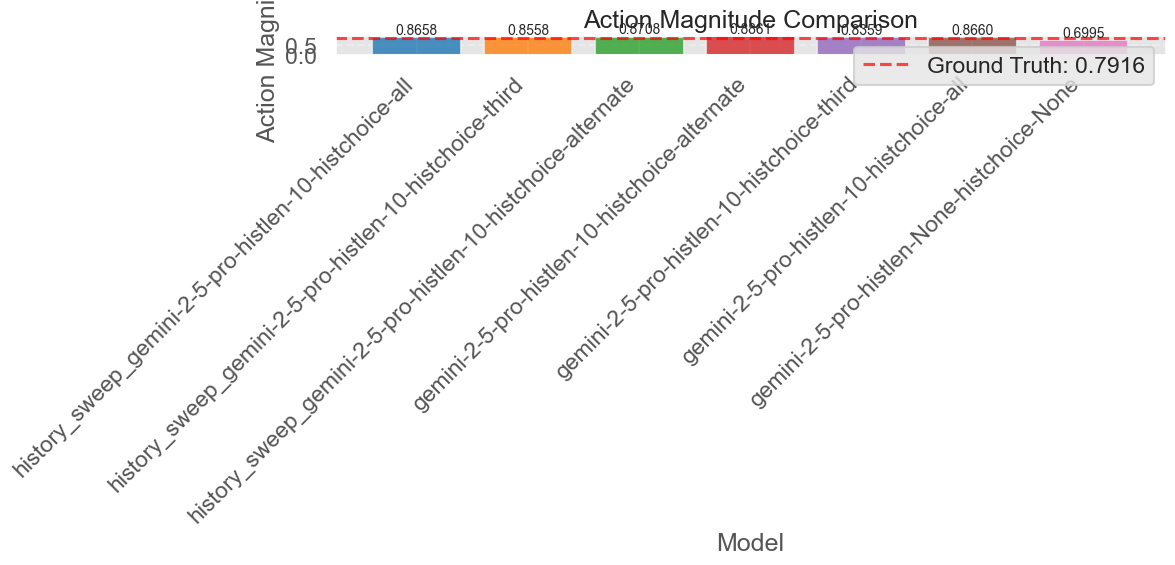

In [243]:
# Improved action magnitude comparison plot with simple color scheme
# Extract data
models = list(comparison_metrics.keys())
pred_mags = [comparison_metrics[model]['pred_mag'] for model in models]
gt_mag = comparison_metrics[models[0]]['gt_mag']  # Ground truth should be the same for all models

# Set up a simple color palette
colors = plt.cm.tab10(np.arange(len(models)))

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(np.arange(len(models)), pred_mags, color=colors, alpha=0.8)

# Add horizontal line for ground truth
ax.axhline(y=gt_mag, color='red', linestyle='--', alpha=0.7, label=f'Ground Truth: {gt_mag:.4f}')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 
            height + 0.01,
            f'{height:.4f}', 
            ha='center', 
            va='bottom',
            fontsize=10)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Action Magnitude')
ax.set_title('Action Magnitude Comparison')
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()

## Trajectory-level Analysis

In [244]:
# Function to extract trajectory-level metrics for all models
def get_trajectory_metrics(model_data, metric_name='mse'):
    traj_metrics = {}
    
    for model_name, data in model_data.items():
        # If we have pre-computed metrics, use those
        if 'metrics' in data and 'results' in data['metrics']:
            traj_metrics[model_name] = [r.get(metric_name, np.nan) for r in data['metrics']['results']]
        else:
            # Otherwise, compute metrics from actions
            print(f"Computing trajectory metrics for {model_name}...")
            model_traj_metrics = []
            
            for traj in data['actions']:
                pred_actions = traj['pred_actions']
                gt_actions = traj['gt_actions']
                
                if metric_name == 'mse':
                    value = np.mean(np.square(pred_actions - gt_actions))
                elif metric_name == 'mae':
                    value = np.mean(np.abs(pred_actions - gt_actions))
                else:
                    # Compute the requested metric
                    results = compute_metrics(pred_actions, gt_actions)
                    value = results.get(metric_name, np.nan)
                    
                model_traj_metrics.append(value)
            
            traj_metrics[model_name] = model_traj_metrics
    
    return traj_metrics

Computing trajectory metrics for gemini-2.5-pro-historytest...


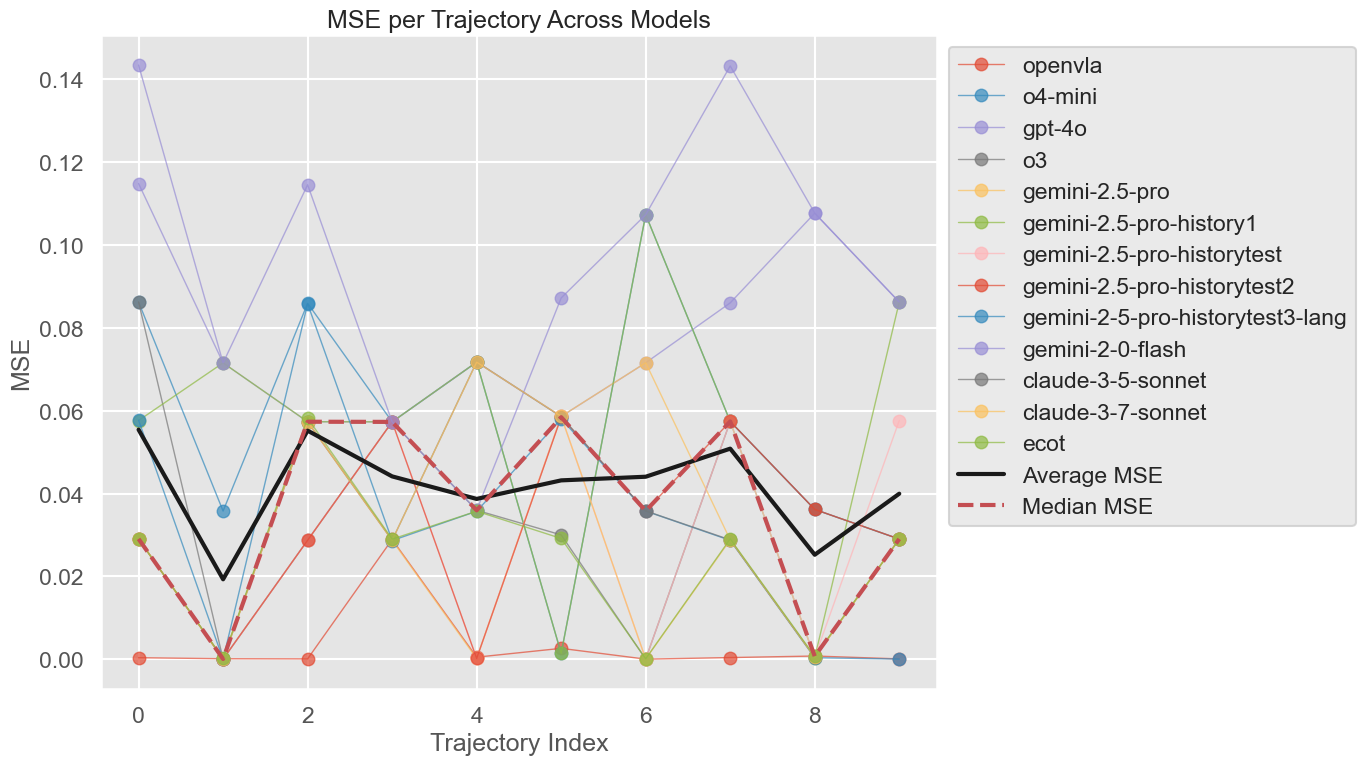

In [245]:
# Get MSE for each trajectory across models
traj_mse = get_trajectory_metrics(model_data, 'mse')

# Calculate average and median MSE for each trajectory (across all models)
traj_indices = range(len(next(iter(traj_mse.values()))))
avg_per_traj = [np.mean([traj_mse[model][i] for model in traj_mse.keys()]) for i in traj_indices]
median_per_traj = [np.median([traj_mse[model][i] for model in traj_mse.keys()]) for i in traj_indices]

# Plot trajectory-level MSE comparison
plt.figure(figsize=(14, 8))

# Plot individual model lines
for model_name, mse_values in traj_mse.items():
    plt.plot(traj_indices, mse_values, marker='o', alpha=0.7, linewidth=1, label=model_name)

# Plot average and median with thicker lines for emphasis
plt.plot(traj_indices, avg_per_traj, 'k-', linewidth=3, label='Average MSE')
plt.plot(traj_indices, median_per_traj, 'r--', linewidth=3, label='Median MSE')

plt.title('MSE per Trajectory Across Models')
plt.xlabel('Trajectory Index')
plt.ylabel('MSE')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

/var/folders/5j/szpjnxwx0d163nc227d2njt80000gp/T/ipykernel_23631/60487583.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=box_labels, patch_artist=True)


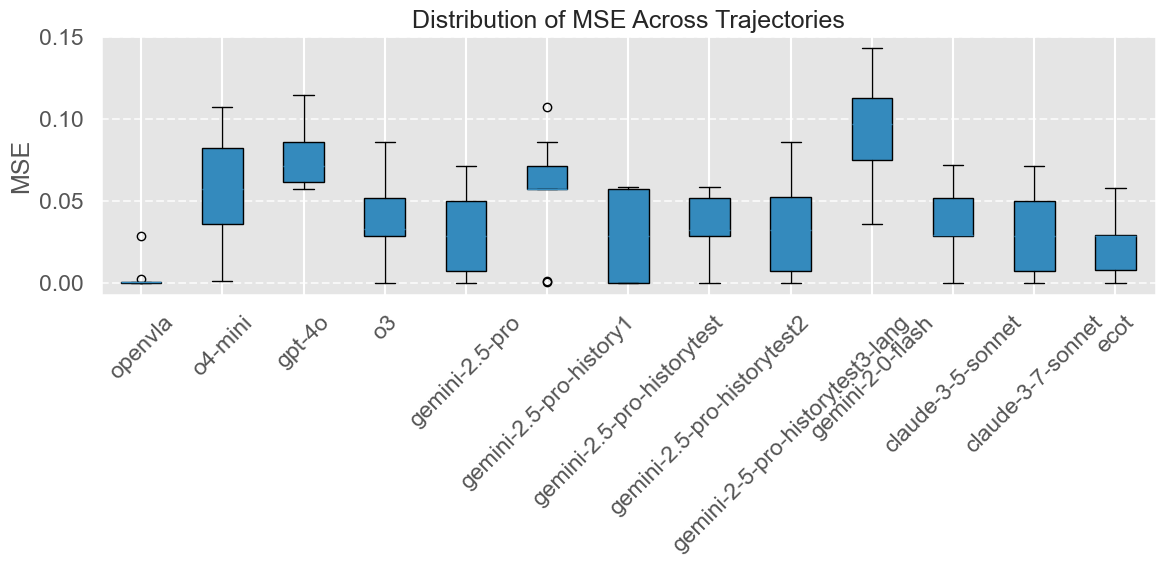

In [246]:
# Create boxplot for comparison of MSE distribution across models
plt.figure(figsize=(12, 6))

# Prepare data for boxplot
box_data = [values for model, values in traj_mse.items()]
box_labels = list(traj_mse.keys())

plt.boxplot(box_data, labels=box_labels, patch_artist=True)
plt.title('Distribution of MSE Across Trajectories')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## Dimension-wise Action Analysis

In [247]:
# Analyze MSE by action dimension
def compute_dimension_mse(model_data):
    dim_mse = {}
    
    # First, get action dimensions from the first model
    first_model = next(iter(model_data.values()))
    first_traj = first_model['actions'][0]
    action_dims = first_traj['pred_actions'].shape[1]
    
    for model_name, data in model_data.items():
        dim_mse[model_name] = []
        
        for dim in range(action_dims):
            dim_errors = []
            
            for traj in data['actions']:
                pred_dim = traj['pred_actions'][:, dim]
                gt_dim = traj['gt_actions'][:, dim]
                dim_errors.append(np.mean(np.square(pred_dim - gt_dim)))
            
            dim_mse[model_name].append(np.mean(dim_errors))
    
    return dim_mse, action_dims

/var/folders/5j/szpjnxwx0d163nc227d2njt80000gp/T/ipykernel_23631/2070493640.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=30, ha='right', fontsize=10)
/var/folders/5j/szpjnxwx0d163nc227d2njt80000gp/T/ipykernel_23631/2070493640.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=30, ha='right', fontsize=10)
/var/folders/5j/szpjnxwx0d163nc227d2njt80000gp/T/ipykernel_23631/2070493640.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=30, ha='right', fontsize=10)
/var/folders/5j/szpjnxwx0d163nc227d2njt80000gp/T/ipykernel_23631/2070493640.py:46: UserWarning: set_ticklabels() should only be used with a fixed numbe

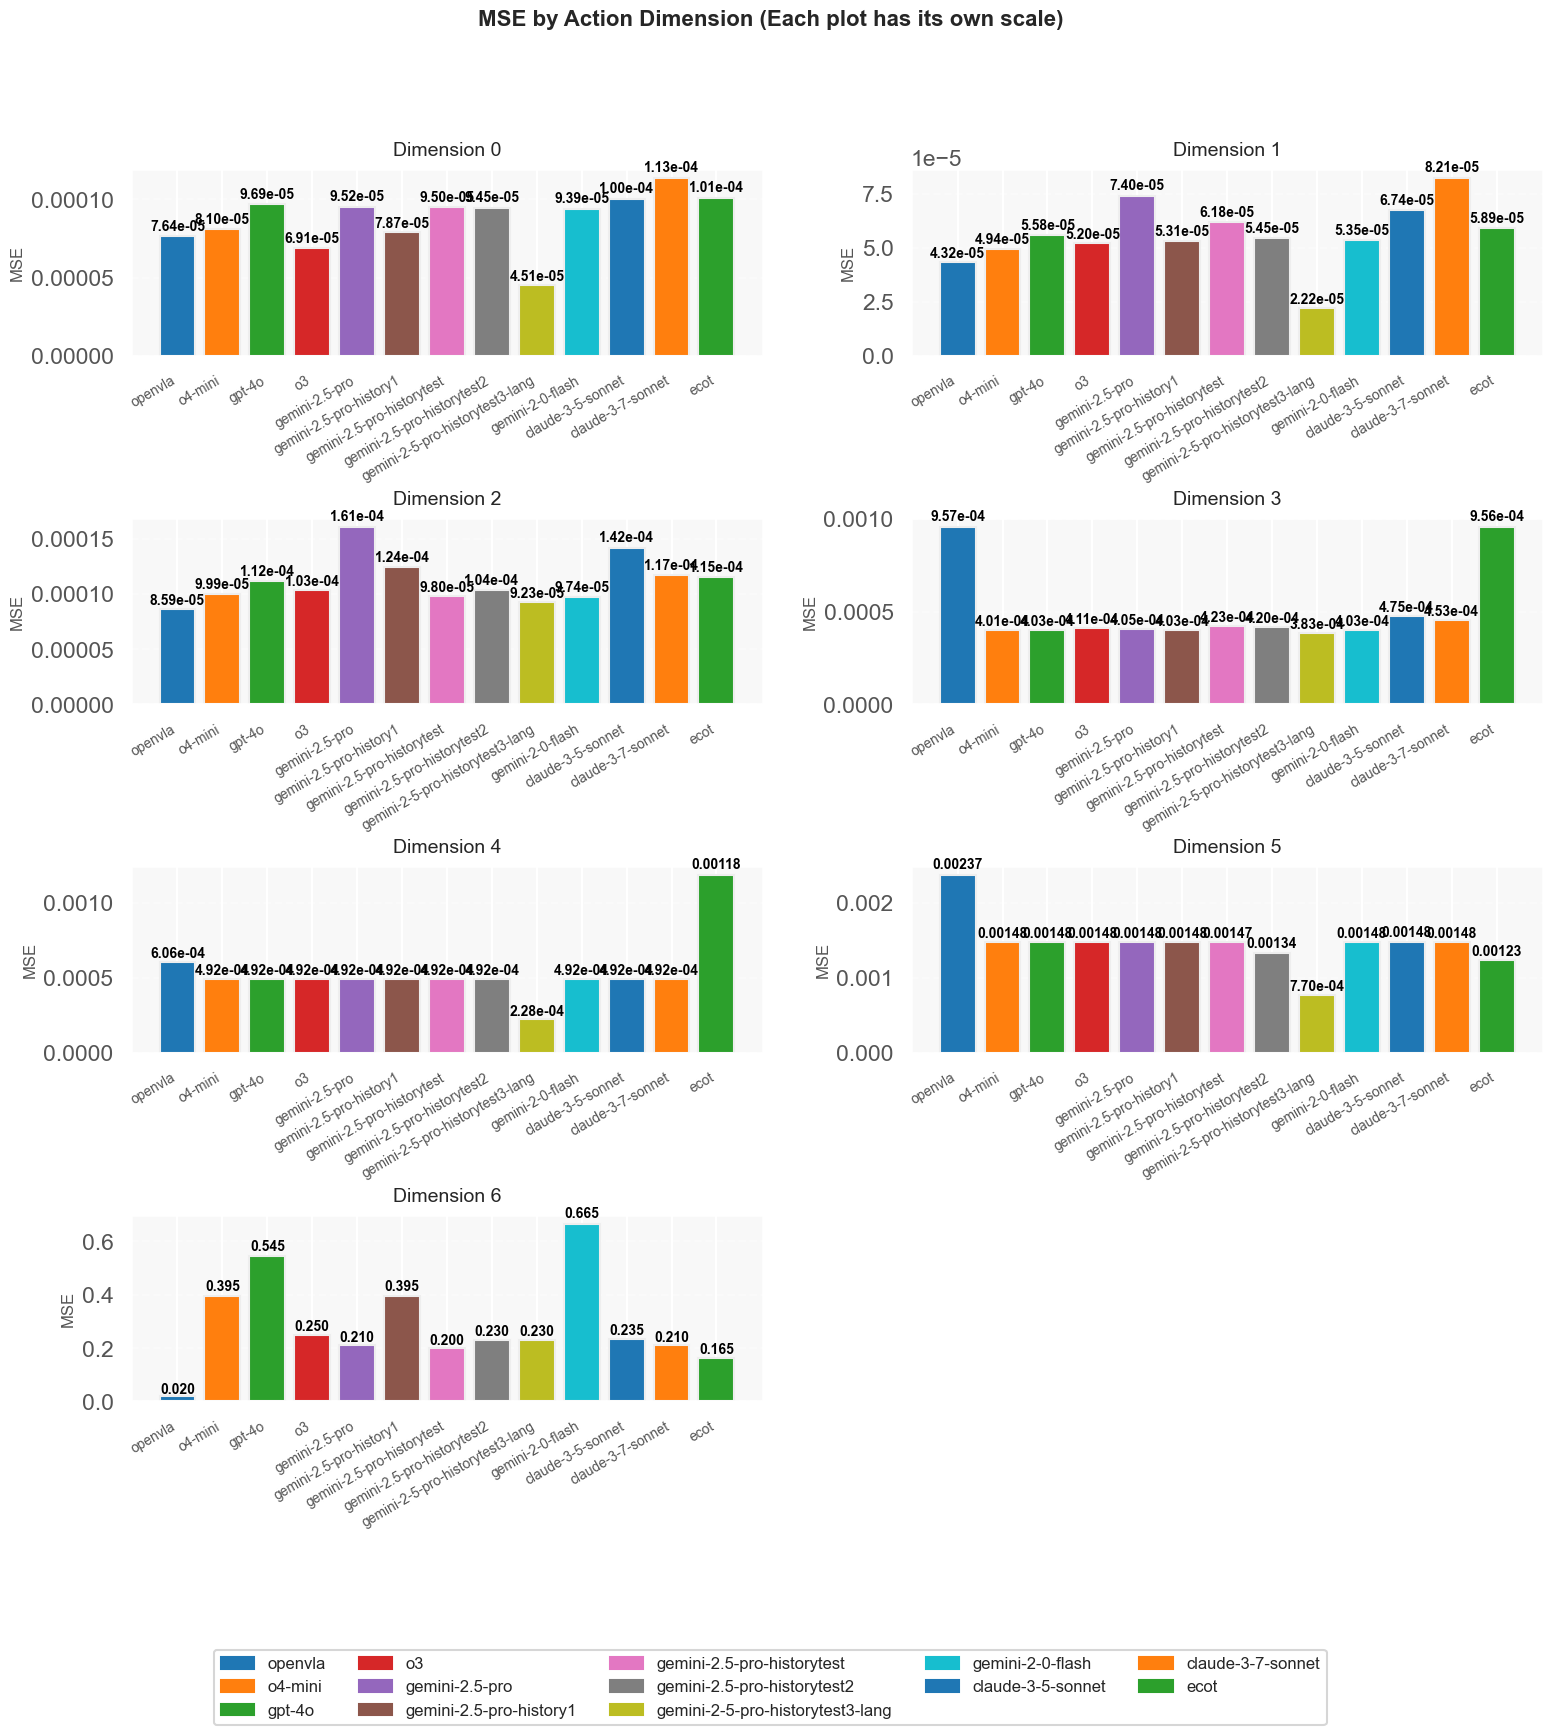

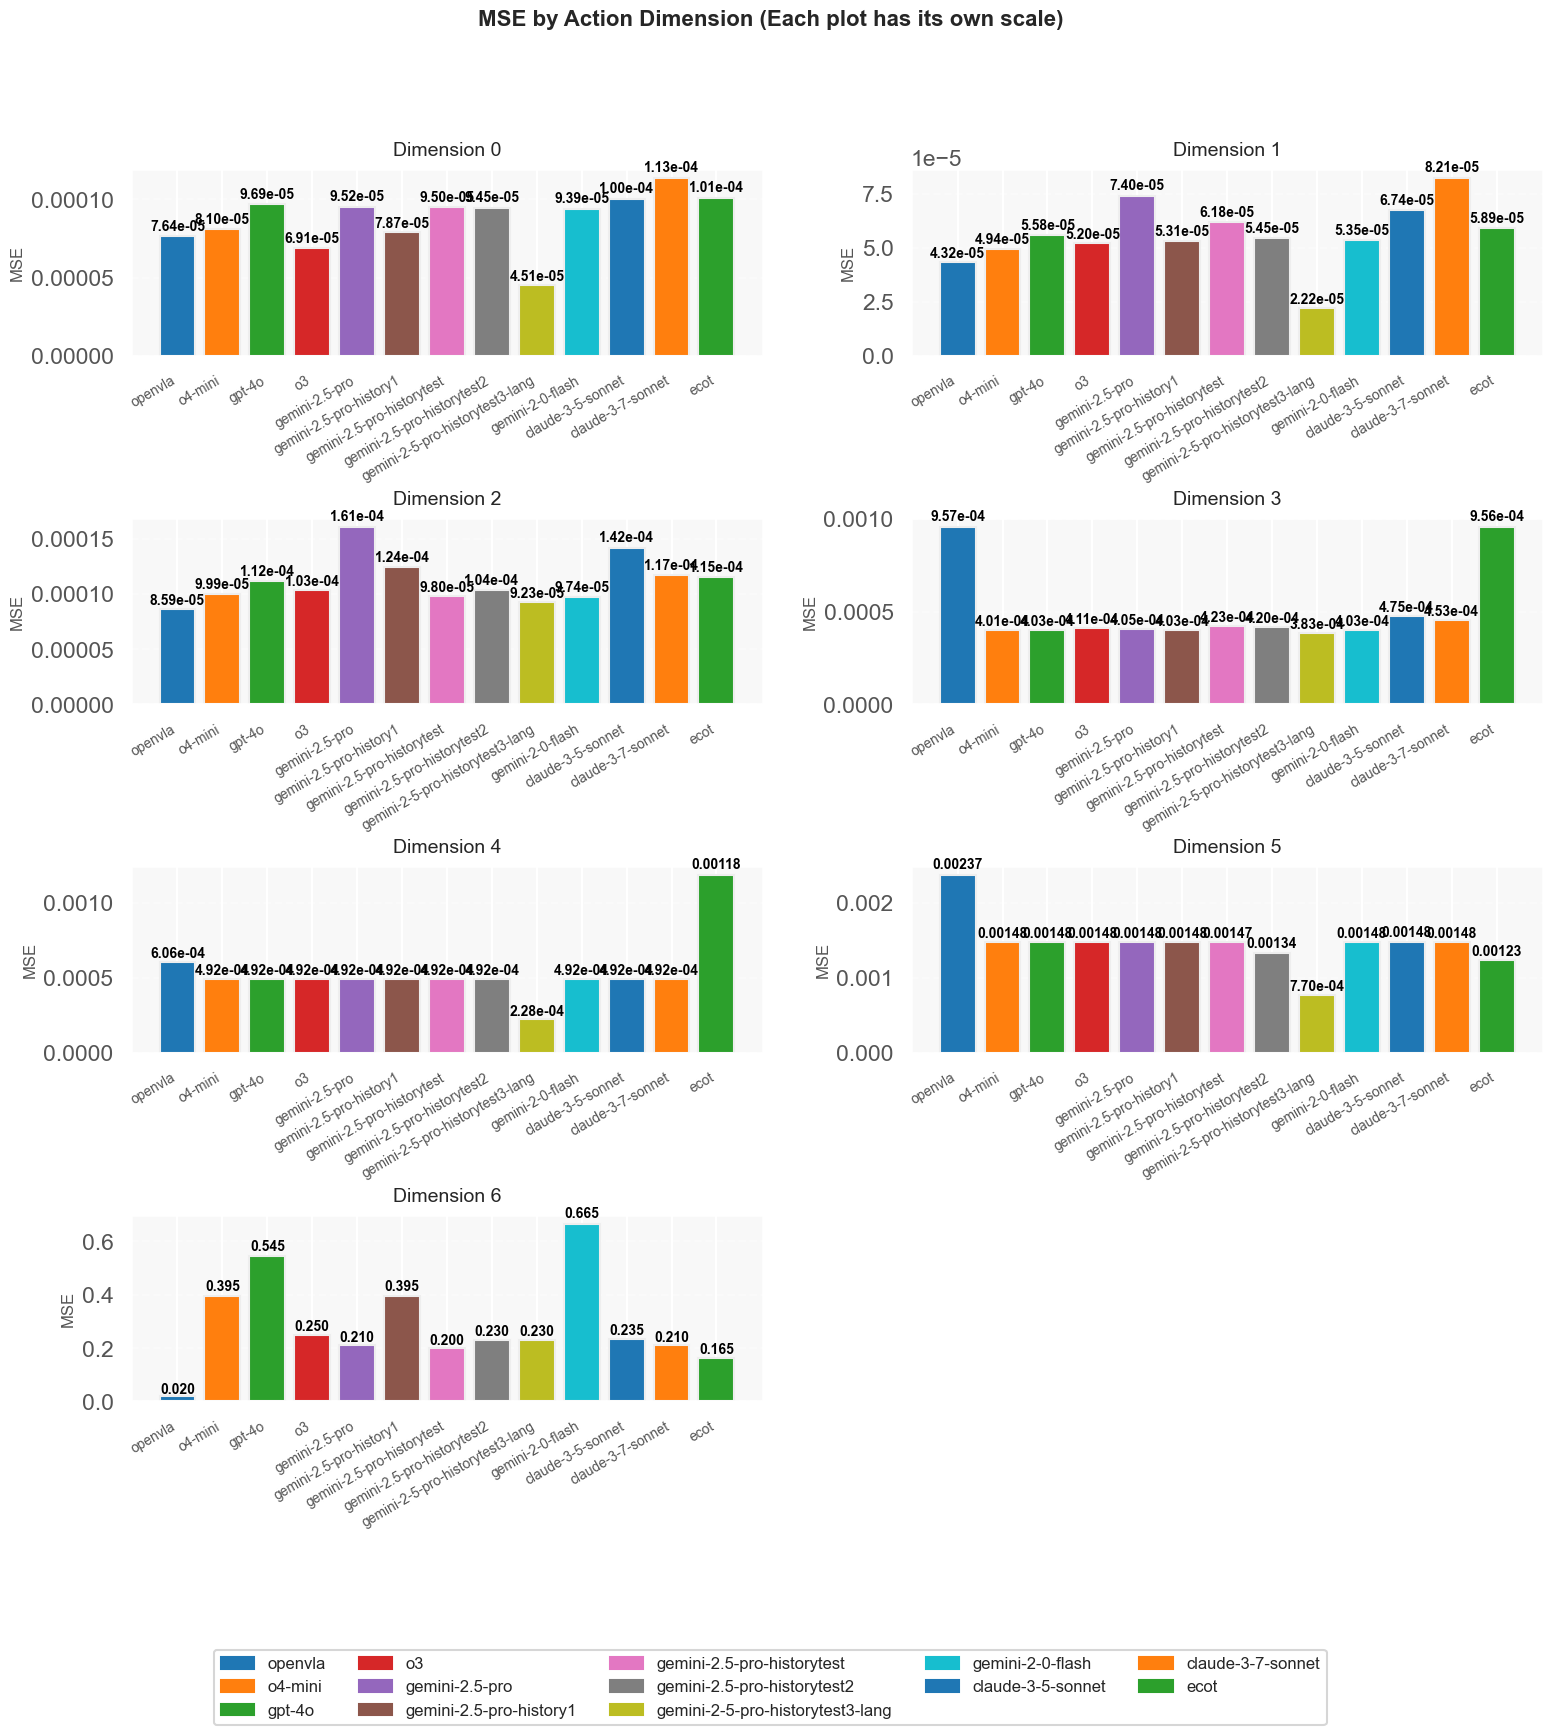

In [248]:
# Plot dimension-wise MSE on separate subplots with improved styling
def plot_dimension_mse_subplots(dim_mse, action_dims):
    # Determine number of rows and columns for subplots
    ncols = 2
    nrows = (action_dims + ncols - 1) // ncols  # Ceiling division
    
    # Create figure with subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4*nrows))
    axes = axes.flatten() if nrows > 1 or ncols > 1 else [axes]
    
    # Define a colormap for consistent colors across models
    colors = plt.cm.tab10.colors  # Get colors from tab10 colormap
    model_names = list(dim_mse.keys())
    model_colors = {model: colors[i % len(colors)] for i, model in enumerate(model_names)}
    
    # Plot each dimension in its own subplot
    for dim in range(action_dims):
        ax = axes[dim]
        
        # Extract MSE values for this dimension across all models
        mse_values = [dim_mse[model][dim] for model in model_names]
        
        # Create bar plot for this dimension with custom colors
        bars = ax.bar(model_names, mse_values, color=[model_colors[model] for model in model_names])
        
        # Add value labels on top of bars with better formatting
        for bar in bars:
            height = bar.get_height()
            # Format the text based on the magnitude
            if height < 0.001:
                text = f'{height:.2e}'  # Scientific notation for very small values
            elif height < 0.01:
                text = f'{height:.5f}'
            else:
                text = f'{height:.3f}'
                
            ax.text(bar.get_x() + bar.get_width()/2., height * 1.02,
                   text, ha='center', va='bottom', fontsize=10, 
                   rotation=0, fontweight='bold', color='black')
        
        # Set title and labels with better styling
        ax.set_title(f'Dimension {dim}', fontsize=14, pad=10)
        ax.set_ylabel('MSE', fontsize=12)
        
        # Improve x-tick labels
        ax.set_xticklabels(model_names, rotation=30, ha='right', fontsize=10)
        
        # Improve grid and background
        ax.grid(axis='y', linestyle='--', alpha=0.3)
        ax.set_axisbelow(True)  # Put grid lines behind bars
        
        # Add light background color
        ax.set_facecolor('#f8f8f8')
    
    # Hide any unused subplots
    for i in range(action_dims, len(axes)):
        axes[i].set_visible(False)
    
    # Add a single legend for all subplots
    handles = [plt.Rectangle((0,0), 1, 1, color=model_colors[model]) for model in model_names]
    fig.legend(handles, model_names, loc='upper center', bbox_to_anchor=(0.5, 0), 
              ncol=min(5, len(model_names)), fontsize=12, frameon=True, facecolor='white')
    
    plt.tight_layout()
    plt.suptitle('MSE by Action Dimension (Each plot has its own scale)', 
                y=1.02, fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.92, bottom=0.15)  # Make room for the legend at the bottom
    
    return fig

# Compute dimension-wise MSE
dim_mse, action_dims = compute_dimension_mse(model_data)
# Use this function to plot the dimension-wise MSE
plot_dimension_mse_subplots(dim_mse, action_dims)

In [249]:
comparison_df

history_sweep_gemini-2-5-pro-histlen-10-histchoice-all  \
mse                                                           0.030922        
mae                                                           0.036518        
nmse                                                          0.335432        
r2                                                            0.664568        
cosine_sim                                                    0.869490        
pearson_r                                                     0.855255        
pred_mag                                                      0.865771        
gt_mag                                                        0.791604        
mag_ratio                                                     1.147818        
mean_inference_time                                                NaN        

                     history_sweep_gemini-2-5-pro-histlen-10-histchoice-third  \
mse                                                           0.032367          
mae                                                           0.037806          
nmse                                                          0.378163          
r2                                                            0.621837          
cosine_sim                                                    0.838502          
pearson_r                                                     0.822191          
pred_mag                                                      0.855773          
gt_mag                                                        0.791604          
mag_ratio                                                     1.106585          
mean_inference_time                                                NaN          

                     history_sweep_gemini-2-5-pro-histlen-10-histchoice-alternate  \
mse                                                           0.017341              
mae                                                           0.022630              
nmse                                                          0.186644              
r2                                                            0.813356              
cosine_sim                                                    0.930549              
pearson_r                                                     0.921957              
pred_mag                                                      0.870769              
gt_mag                                                        0.791604              
mag_ratio                                                     1.115096              
mean_inference_time                                                NaN              

                     gemini-2-5-pro-histlen-10-histchoice-alternate  \
mse                                                        0.020912   
mae                                                        0.026138   
nmse                                                       0.224592   
r2                                                         0.775408   
cosine_sim                                                 0.918197   
pearson_r                                                  0.908259   
pred_mag                                                   0.886057   
gt_mag                                                     0.791604   
mag_ratio                                                  1.148642   
mean_inference_time                                             NaN   

                     gemini-2-5-pro-histlen-10-histchoice-third  \
mse                                                    0.035215   
mae                                                    0.040859   
nmse                                                   0.406234   
r2                                                     0.593766   
cosine_sim                                             0.825148   
pearson_r                                              0.807511   
pred_mag                                               0.835853   
gt_ma

In [250]:

pred_actions = {k: [tj['pred_actions'] for tj in v['actions']] for k,v in model_data.items()}
gt_actions = {k: [tj['gt_actions'] for tj in v['actions']] for k,v in model_data.items()}

pred_actions = {k: np.concatenate(v, axis=0 ) for k,v in pred_actions.items()}
gt_actions = {k: np.concatenate(v, axis=0) for k,v in gt_actions.items()}

for k in pred_actions.keys():
    print(f"pred: {k}, {pred_actions[k].shape}")
    print(f"gt: {k}, {gt_actions[k].shape}")


pred: openvla, (46, 7)
gt: openvla, (46, 7)
pred: o4-mini, (46, 7)
gt: o4-mini, (46, 7)
pred: gpt-4o, (46, 7)
gt: gpt-4o, (46, 7)
pred: o3, (46, 7)
gt: o3, (46, 7)
pred: gemini-2.5-pro, (46, 7)
gt: gemini-2.5-pro, (46, 7)
pred: gemini-2.5-pro-history1, (46, 7)
gt: gemini-2.5-pro-history1, (46, 7)
pred: gemini-2.5-pro-historytest, (46, 7)
gt: gemini-2.5-pro-historytest, (46, 7)
pred: gemini-2.5-pro-historytest2, (46, 7)
gt: gemini-2.5-pro-historytest2, (46, 7)
pred: gemini-2-5-pro-historytest3-lang, (46, 7)
gt: gemini-2-5-pro-historytest3-lang, (46, 7)
pred: gemini-2-0-flash, (46, 7)
gt: gemini-2-0-flash, (46, 7)
pred: claude-3-5-sonnet, (46, 7)
gt: claude-3-5-sonnet, (46, 7)
pred: claude-3-7-sonnet, (46, 7)
gt: claude-3-7-sonnet, (46, 7)
pred: ecot, (46, 7)
gt: ecot, (46, 7)


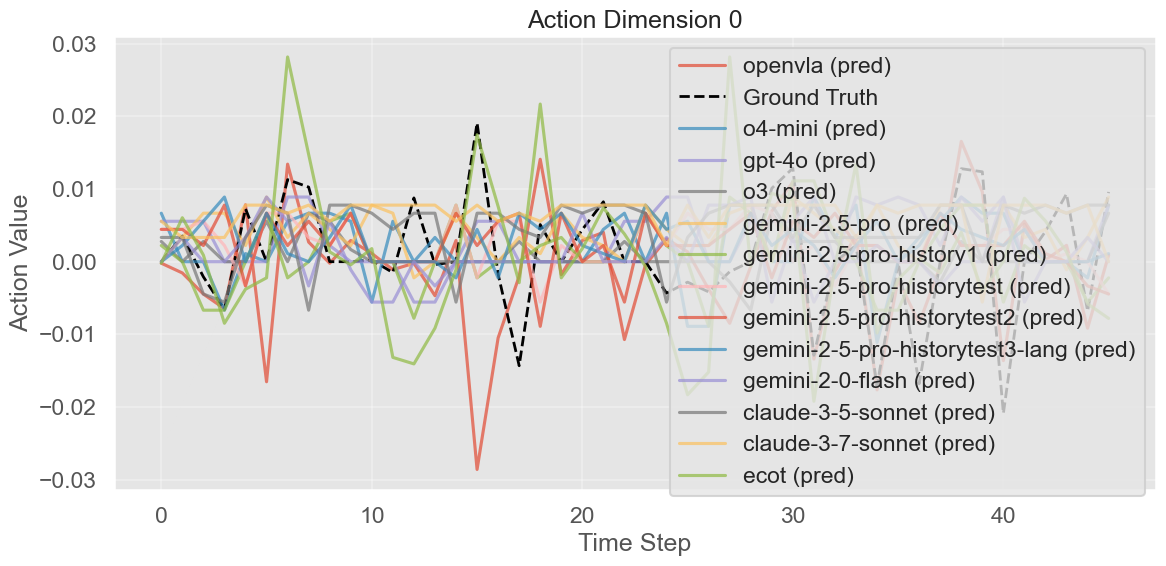

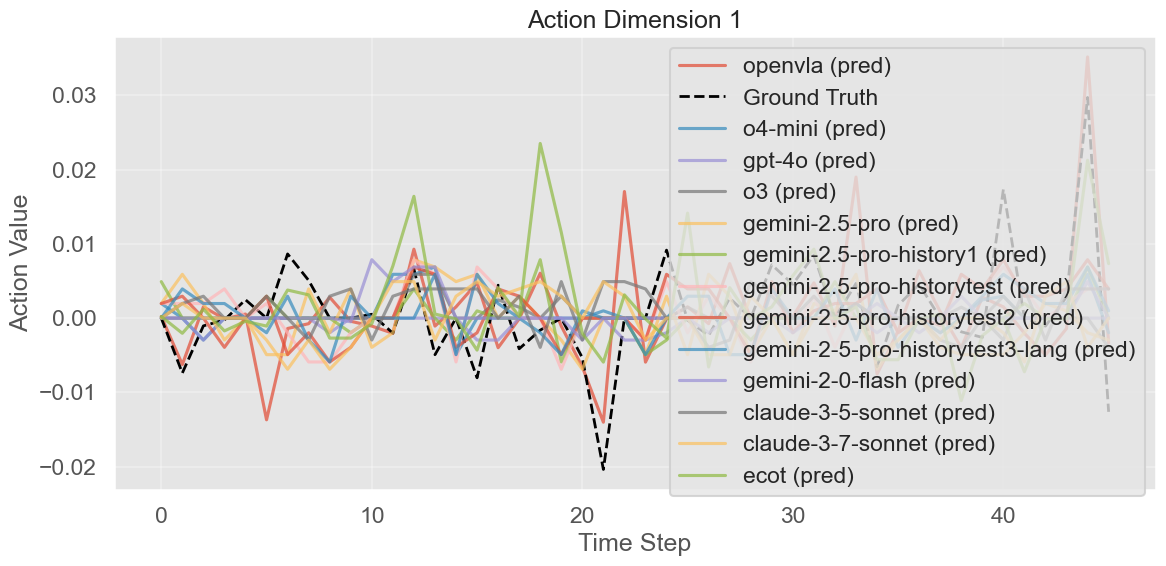

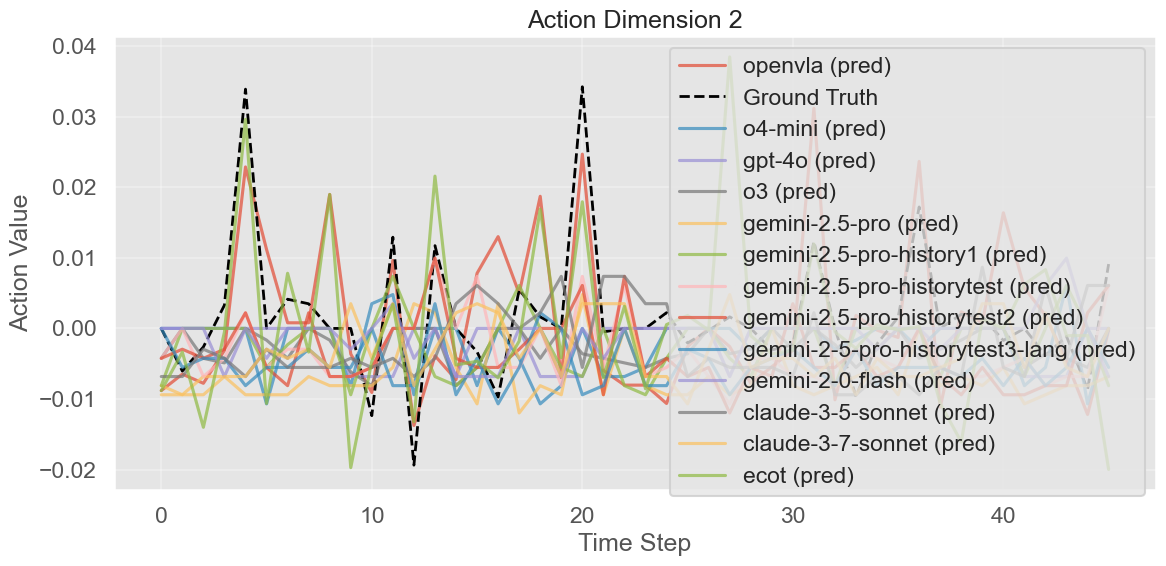

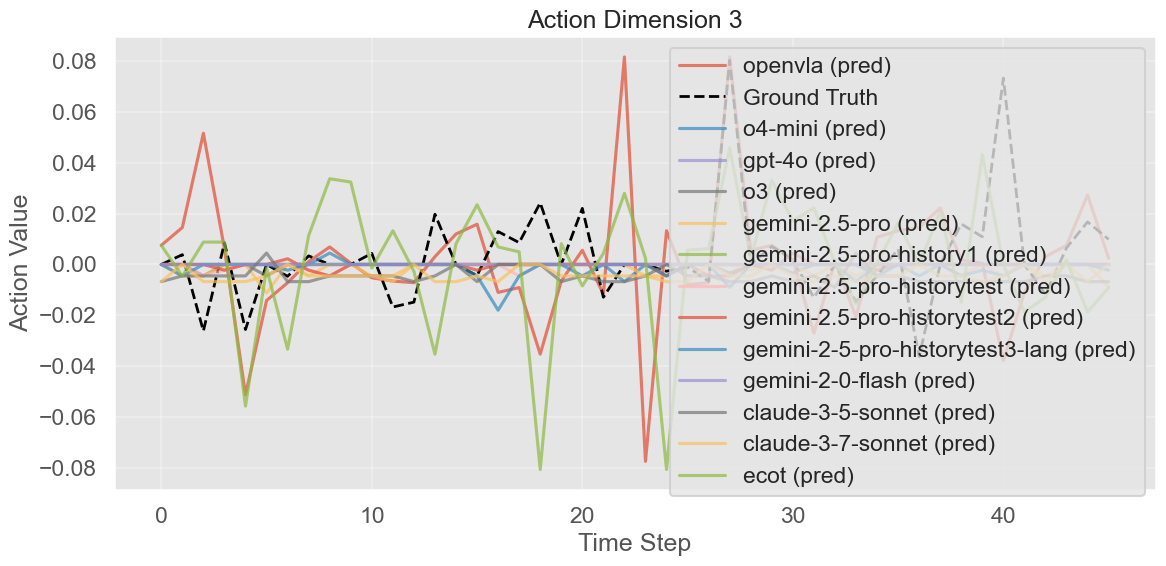

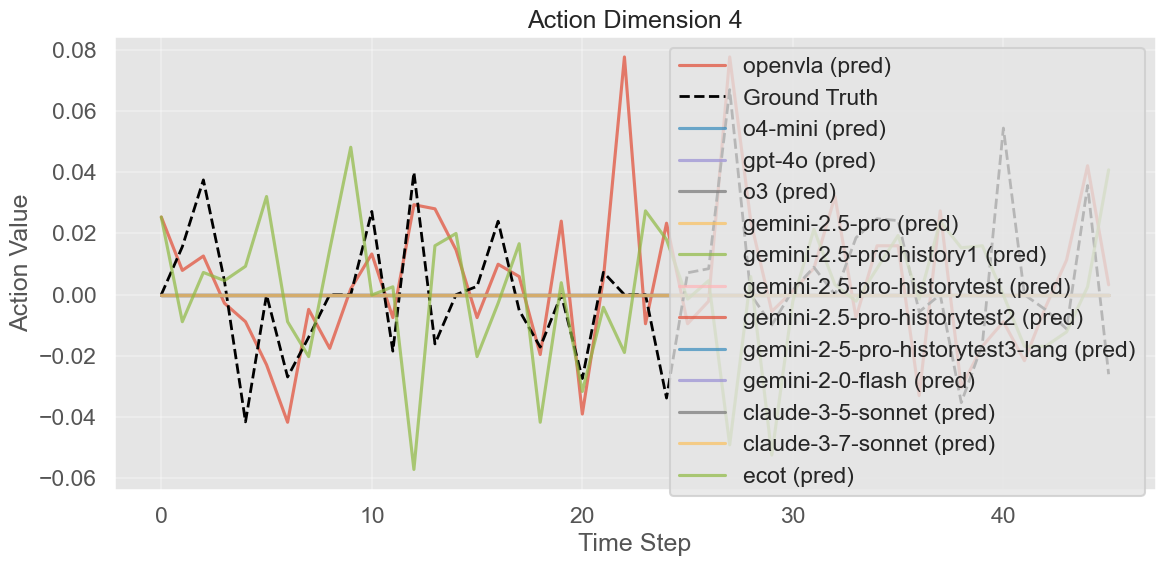

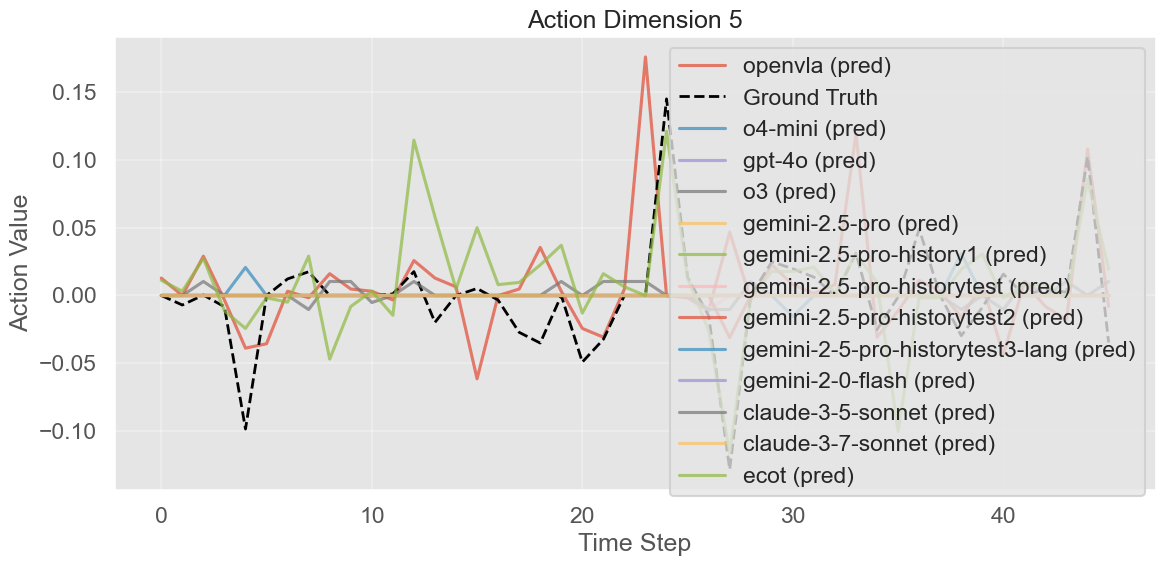

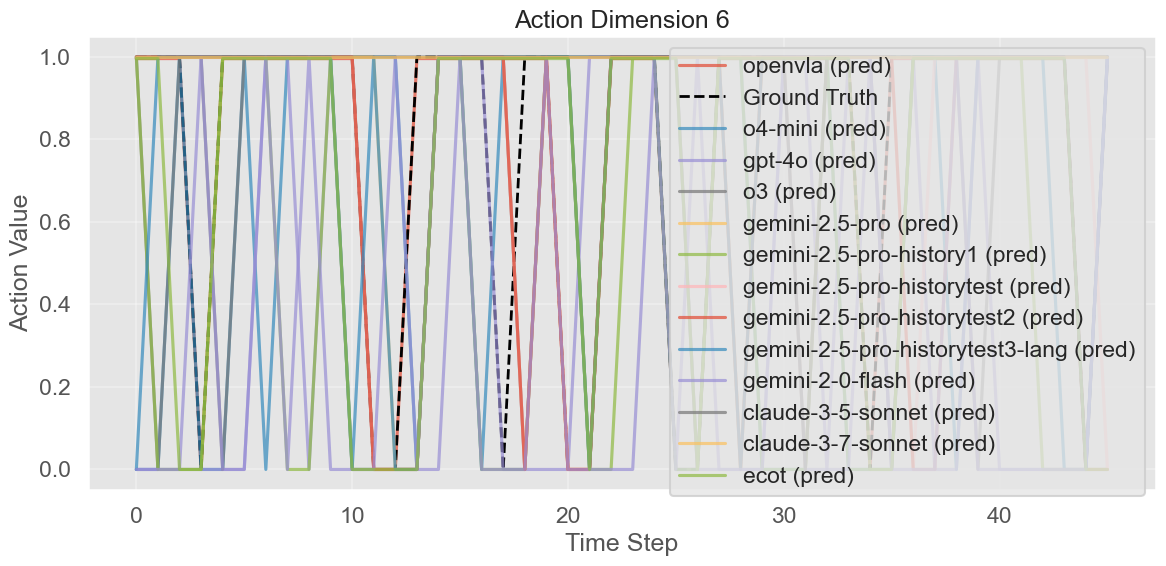

In [251]:
def plot_action_dimensions(pred_actions, gt_actions, model_names=None):
    """
    Plot each dimension of the action data over time steps.
    
    Args:
        pred_actions: Dictionary mapping model names to predicted action arrays
        gt_actions: Dictionary mapping model names to ground truth action arrays
        model_names: Optional list of model names to plot (if None, plots all)
    """
    if model_names is None:
        model_names = list(pred_actions.keys())
    
    # Get the action dimensions from the first model
    first_model = next(iter(pred_actions.values()))
    action_dims = first_model.shape[1]
    
    # Create a figure for each action dimension
    for dim in range(action_dims):
        plt.figure(figsize=(12, 6))
        
        # Plot predicted actions for each model
        for model in model_names:
            # Get time steps for x-axis
            time_steps = np.arange(len(pred_actions[model]))
            
            # Plot predicted actions
            plt.plot(time_steps, pred_actions[model][:, dim], 
                     label=f"{model} (pred)", alpha=0.7)
            
            # Plot ground truth actions (only once since it's the same for all models)
            if model == model_names[0]:
                plt.plot(time_steps, gt_actions[model][:, dim], 
                         label="Ground Truth", color='black', linestyle='--', linewidth=2)
        
        plt.title(f"Action Dimension {dim}")
        plt.xlabel("Time Step")
        plt.ylabel("Action Value")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_action_dimensions(pred_actions, gt_actions)

In [252]:
def plot_metrics_vs_latency(comparison_df, metrics=None, figsize=(14, 10), save_path=None):
    """
    Create scatterplots of metrics vs latency
    
    Args:
        comparison_df: DataFrame with models as columns and metrics as rows
        metrics: List of metrics to plot against latency (default: ['mse'])
        figsize: Size of the figure (default: (14, 10))
        save_path: Path to save the plot (default: None)
    """
    if metrics is None:
        metrics = ['mse']
    
    # Transpose to get models as rows
    df_transposed = comparison_df.T
    
    # Convert latency to milliseconds
    df_transposed['latency_ms'] = df_transposed['mean_inference_time'] * 1000
    
    # Set up the plot grid
    n_metrics = len(metrics)
    n_cols = min(2, n_metrics)
    n_rows = (n_metrics + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, squeeze=False)
    sns.set(style="whitegrid")
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    # Get unique colors for each model
    colors = sns.color_palette("husl", len(df_transposed))
    
    # Plot each metric
    for i, metric in enumerate(metrics):
        if i < len(axes):
            ax = axes[i]
            
            # Check if the metric exists in the DataFrame
            if metric not in df_transposed.columns:
                ax.text(0.5, 0.5, f"Metric '{metric}' not found", 
                        ha='center', va='center', transform=ax.transAxes)
                continue
            
            # Plot the points
            for j, (model, row) in enumerate(df_transposed.iterrows()):
                ax.scatter(
                    row['latency_ms'], 
                    row[metric], 
                    s=100,  # marker size
                    color=colors[j],
                    label=model,
                    alpha=0.7
                )
                
                # Add model name as text label
                ax.text(
                    row['latency_ms'] * 1.03,  # slightly offset
                    row[metric] * 1.03,  # slightly offset
                    model,
                    fontsize=9
                )
            
            # Add title and labels
            ax.set_title(f'{metric.upper()} vs Latency', fontsize=14)
            ax.set_xlabel('Latency (ms)', fontsize=12)
            ax.set_ylabel(metric.upper(), fontsize=12)
            
            # Rotate x-axis tick labels to prevent overlap
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
            
            # Add grid
            ax.grid(True, linestyle='--', alpha=0.7)
            
            # Annotate the ideal region (low metric, low latency)
            min_latency = df_transposed['latency_ms'].min()
            min_metric = df_transposed[metric].min()
            
            ax.annotate('Better', 
                       xy=(min_latency, min_metric), 
                       xytext=(min_latency + 5, min_metric * 0.7),
                       arrowprops=dict(facecolor='green', shrink=0.05, width=2),
                       fontsize=12, color='green')
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    # Adjust layout with extra bottom margin for rotated labels
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    
    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved as '{save_path}'")
    
    # Show the plot
    plt.show()

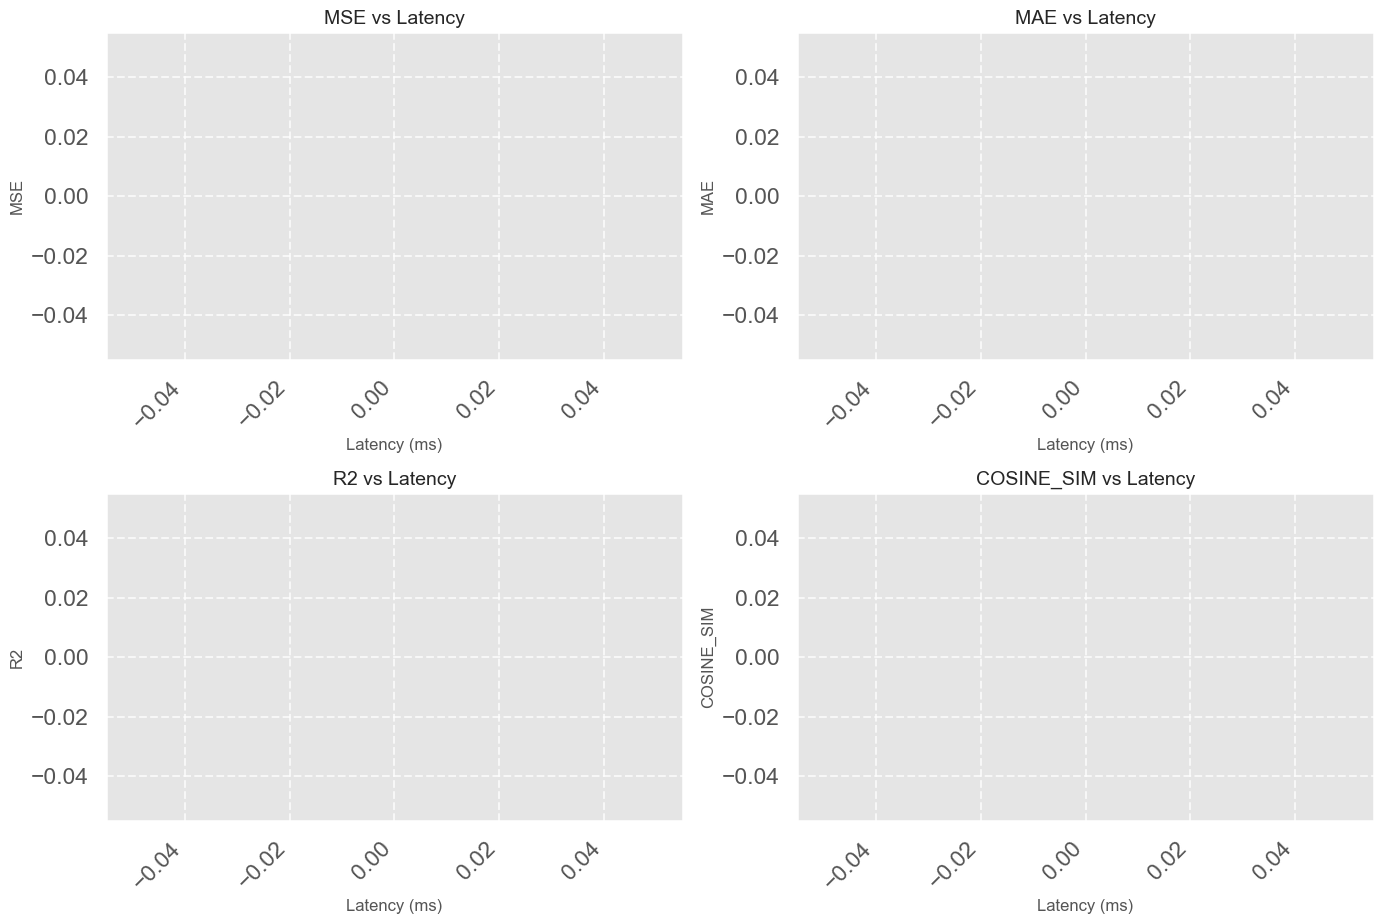

In [253]:
plot_metrics_vs_latency(comparison_df, metrics=['mse', 'mae', 'r2', 'cosine_sim'])
